In [20]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from functools import reduce

In [21]:
# NEW PARAMETERS

# Controls
space_for_pet = 2
population_density_farmland = 2.5
population_density_suburban = 2500
population_density_urban = 4200

# Income Parameters
#required_income_farmland = 80000
#steepness_farmland = 0.00003

#required_income_suburban = 100000
#steepness_suburban = 0.00004

#required_income_urban = 120000
#steepness_urban = 0.00005



# Time Parameters
pet_time_requirement = 2
free_time_std = 1

# Space Parameters
floor_area_farmland = 300
outside_area_farmland = 10000

floor_area_suburban = 160
outside_area_suburban = 560

floor_area_urban = 80
outside_area_urban = 5



In [22]:
def get_income_index (income, population_density_income):
    required_income = 9947.81 * math.log10(3.7968e7 * population_density_income)
    steepness = 0.0000049739 * math.log10(370620 * population_density_income)
    return 1 / (1 + math.exp(-steepness*(income-required_income)))

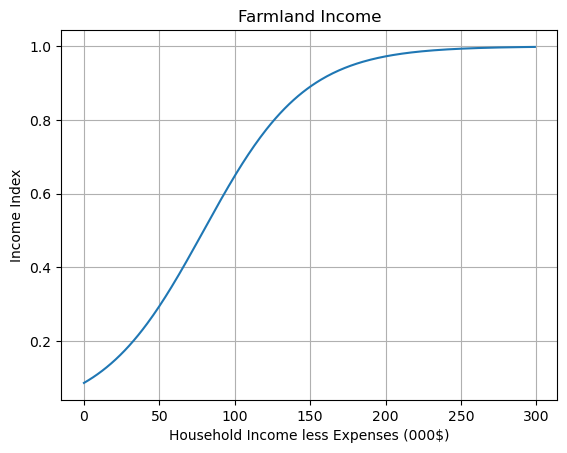

In [23]:
# measures whether a family is financially able to provide for a pet
# def get_income_index_FARMLAND(income, required_income = 60000, steepness = -0.00003):
    # return 1 / (1 + math.exp(steepness*(income-required_income)))
    


X = np.arange(0,300000, 1000)
Y = np.array([get_income_index(x, population_density_farmland) for x in X])

plt.grid()
plt.title("Farmland Income")
plt.xlabel("Household Income less Expenses (000$)")
plt.ylabel("Income Index")
plt.plot(X/1_000,Y)

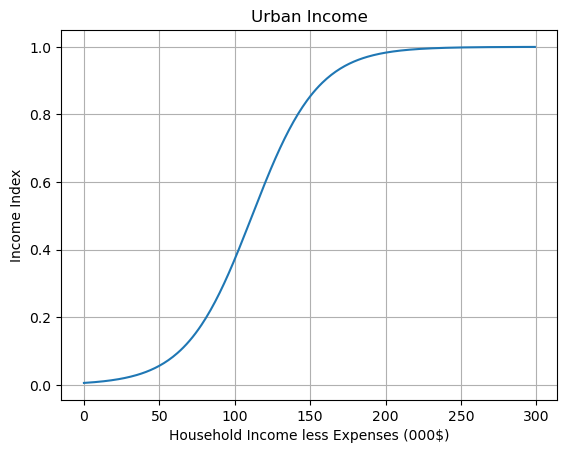

In [24]:
# measures whether an urban family is financially able to provide for a pet
# def get_income_index_URBAN(income, required_income = 100000, steepness = -0.00004):
  #  return 1 / (1 + math.exp(steepness*(income-required_income)))

X = np.arange(0,300_000, 1_000)
Y = np.array([get_income_index(x, population_density_urban) for x in X])

plt.grid()
plt.title("Urban Income")
plt.xlabel("Household Income less Expenses (000$)")
plt.ylabel("Income Index")
plt.plot(X/1_000,Y)

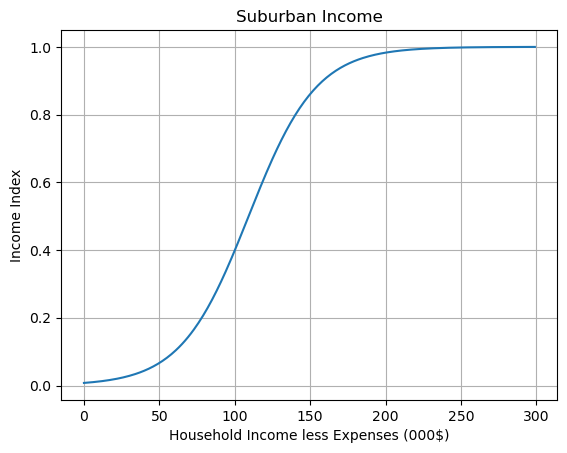

In [25]:
# measures whether a suburban family is financially able to provide for a pet
# def get_income_index_SUBURBAN(income, required_income = 120000, steepness = -0.000022):
  #  return 1 / (1 + math.exp(steepness*(income-required_income)))

X = np.arange(0,300_000, 1_000)
Y = np.array([get_income_index(x, population_density_suburban) for x in X])

plt.grid()
plt.title("Suburban Income")
plt.xlabel("Household Income less Expenses (000$)")
plt.ylabel("Income Index")
plt.plot(X/1_000,Y)

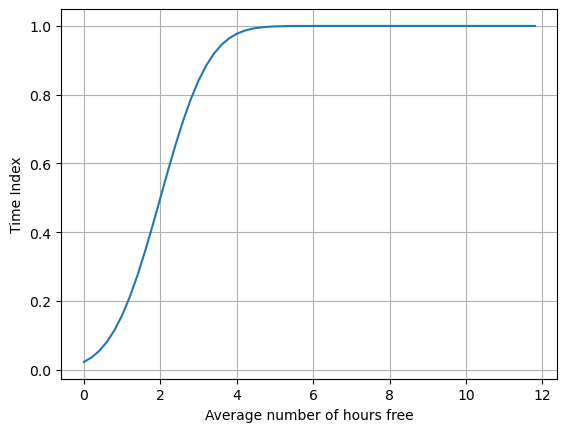

In [26]:
# measures whether someone has the time to take care of a pet
def get_time_index(owner_free_time, pet_time_requirement, free_time_std):
    z = (owner_free_time - pet_time_requirement) / free_time_std
    return norm.cdf(z)

X = np.arange(0, 12, 0.2)
Y = np.array([get_time_index(x, pet_time_requirement, free_time_std) for x in X])

plt.grid()
plt.title("Free Time")
plt.xlabel("Average number of hours free")
plt.ylabel("Time Index")
plt.plot(X,Y)

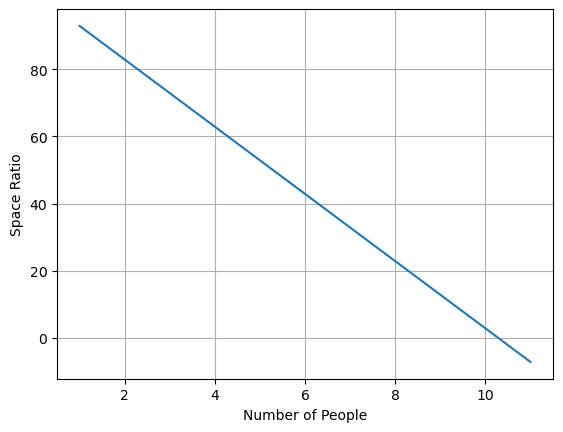

In [27]:
def get_space_ratio(floor_area, outside_area, people, space_for_pet, neccesary_space = 0, space_per_person = 20):
    human_space = 0.6 * floor_area + 10*math.log10(outside_area+1) - neccesary_space - space_per_person*people - space_for_pet
    # space = 0.6 * floor_area + 10 * math.log10(outside_area + 1) 
    space_ratio = human_space / space_for_pet

    return space_ratio

X = np.arange(1, 12, 1)
Y = np.array([get_space_ratio(300, 600, x, space_for_pet) for x in X])

plt.grid()
plt.xlabel("Number of People")
plt.ylabel("Space Ratio")
plt.plot(X,Y)

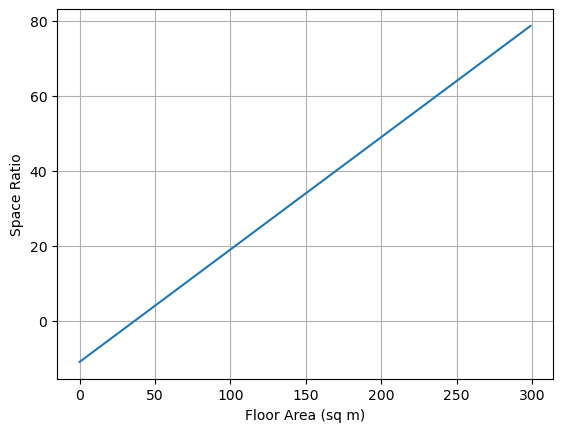

In [28]:
X = np.arange(0, 300, 1)
Y = np.array([get_space_ratio(x, 0, 1, space_for_pet) for x in X])

plt.grid()
plt.xlabel("Floor Area (sq m)")
plt.ylabel("Space Ratio")
plt.plot(X,Y)

In [29]:
# Get space index
def get_space_index(floor_area, outside_area, people, population_density, space_for_pet, neccesary_space = 10, space_per_person = 20):
    ratio = get_space_ratio(floor_area, outside_area, people, space_for_pet, neccesary_space, space_per_person)
    
    median = -0.00559007*population_density + 26.1558
    steepness = 0.0000275031*population_density + 0.0702201

    return 1/(1+math.exp(-steepness*(ratio-median)))

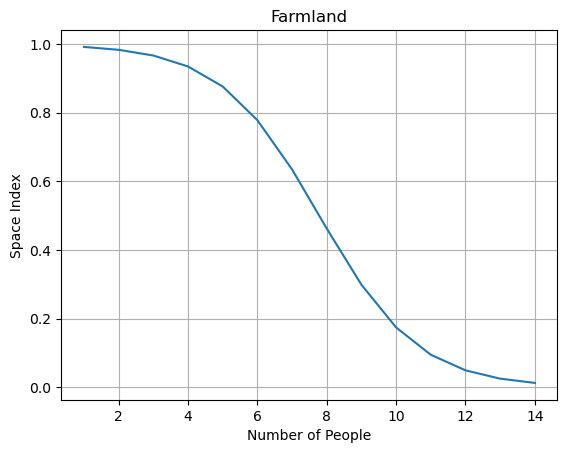

In [30]:
# FARM LAND
X = np.arange(1, 15, 1)
Y = np.array([get_space_index(floor_area_farmland, outside_area_farmland, x, population_density_farmland, space_for_pet) for x in X])

plt.grid()
plt.title("Farmland")
plt.xlabel("Number of People")
plt.ylabel("Space Index")
plt.plot(X,Y)


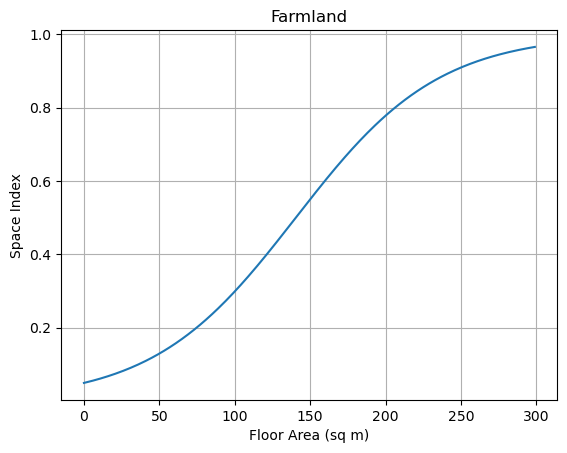

In [31]:
X = np.arange(0, 300, 1)
Y = np.array([get_space_index(x, 0, 1, population_density_farmland, space_for_pet) for x in X])

plt.grid()
plt.title("Farmland")
plt.xlabel("Floor Area (sq m)")
plt.ylabel("Space Index")
plt.plot(X,Y)

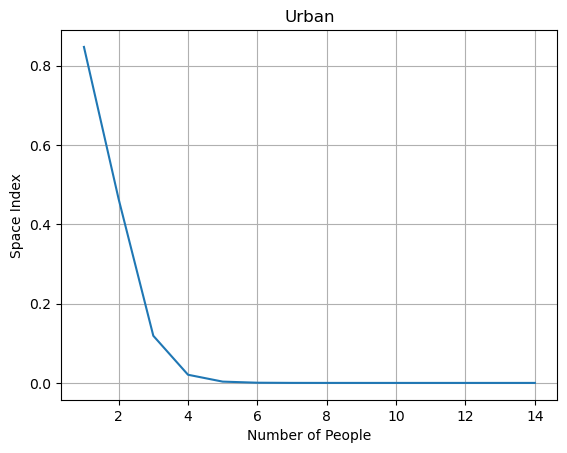

In [32]:
# def get_space_index_URBAN(floor_area, outside_area, people, space_for_pet = 2, neccesary_space = 10, space_per_person = 20):
   # ratio = get_space_ratio(floor_area, outside_area, people, space_for_pet, neccesary_space, space_per_person)
   # return 1/(1+math.exp(-0.2*(ratio-1)))

X = np.arange(1, 15, 1)
Y = np.array([get_space_index(floor_area_urban, outside_area_urban, x, population_density_urban, space_for_pet) for x in X])

plt.grid()
plt.title("Urban")
plt.xlabel("Number of People")
plt.ylabel("Space Index")
plt.plot(X,Y)

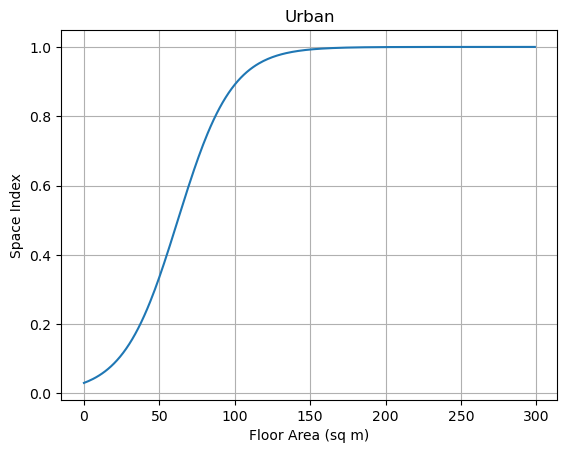

In [33]:
X = np.arange(0, 300, 1)
Y = np.array([get_space_index(x, 0, 1, population_density_urban, space_for_pet) for x in X])

plt.grid()
plt.title("Urban")
plt.xlabel("Floor Area (sq m)")
plt.ylabel("Space Index")
plt.plot(X,Y)

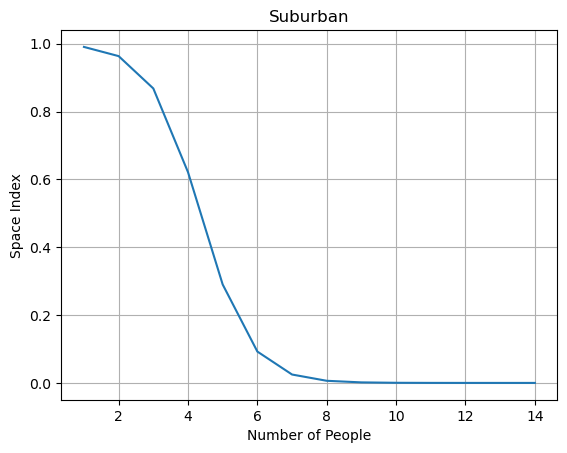

In [34]:
# def get_space_index_SUBURBAN(floor_area, outside_area, people, space_for_pet = 2, neccesary_space = 10, space_per_person = 20):
  #  ratio = get_space_ratio(floor_area, outside_area, people, space_for_pet, neccesary_space, space_per_person)
   # return 1/(1+math.exp(-0.115*(ratio-15)))

X = np.arange(1, 15, 1)
Y = np.array([get_space_index(floor_area_suburban, outside_area_suburban, x, population_density_suburban, space_for_pet) for x in X])

plt.grid()
plt.title("Suburban")
plt.xlabel("Number of People")
plt.ylabel("Space Index")
plt.plot(X,Y)

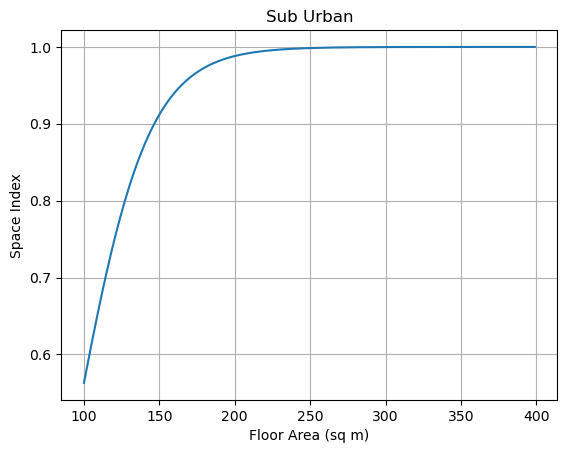

In [35]:
X = np.arange(100, 400, 1)
Y = np.array([get_space_index(x, 0, 1, population_density_suburban, space_for_pet) for x in X])

plt.grid()
plt.title("Sub Urban")
plt.xlabel("Floor Area (sq m)")
plt.ylabel("Space Index")
plt.plot(X,Y)